HEALTHCARE PROJECT

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')# Import necessary libraries
import pandas as pd # to data modeling, data analysis and data manipulation
from sklearn.preprocessing import StandardScaler # to standardize the features
from sklearn.decomposition import PCA # to apply PCA
import seaborn as sns # to plot the heat maps
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import plotly.express as px 
  
import numpy as np
from scipy import stats

In [156]:
##Loading the Dataset
df1 = pd.read_csv("D://data analytics sem 4//DAB 304 HEALTHCARE ANALYTICS//project//healthcare-dataset-stroke prediction.csv")
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi(body mass index),smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [135]:
#shape of the dataset.
df1.shape

(5110, 12)

In [136]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5110 non-null   int64  
 1   gender                5110 non-null   object 
 2   age                   5110 non-null   float64
 3   hypertension          5110 non-null   int64  
 4   heart_disease         5110 non-null   int64  
 5   ever_married          5110 non-null   object 
 6   work_type             5110 non-null   object 
 7   Residence_type        5110 non-null   object 
 8   avg_glucose_level     5110 non-null   float64
 9   bmi(body mass index)  4909 non-null   float64
 10  smoking_status        5110 non-null   object 
 11  stroke                5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [137]:
#unique values of  smoking status

df1['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

## CLEANING DATA

In [138]:
df1.isnull().sum()

id                        0
gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
bmi(body mass index)    201
smoking_status            0
stroke                    0
dtype: int64

In [139]:
#we are showing the unique values of the dataset.
df1.nunique().to_frame()

,0
id,5110
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi(body mass index),418


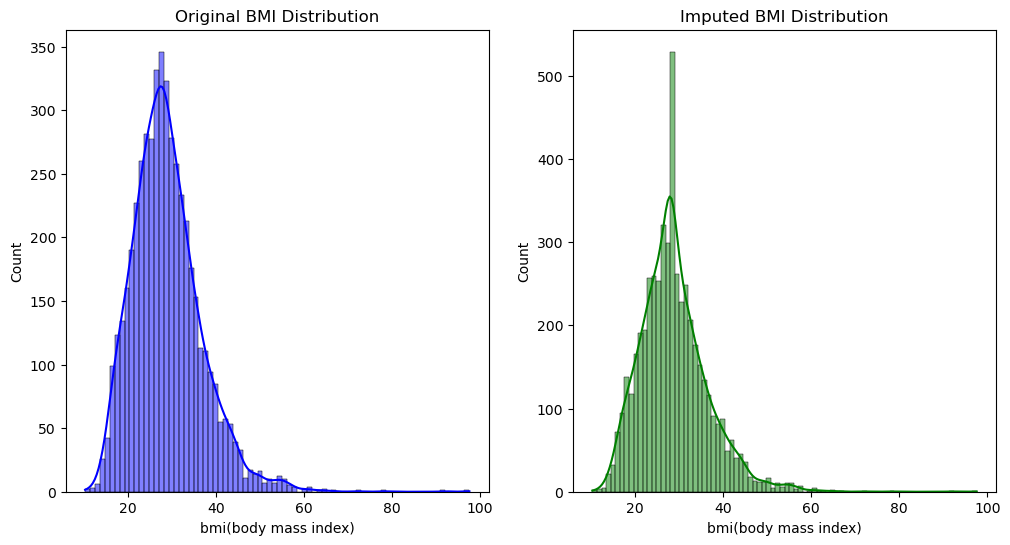

In [153]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your original DataFrame
original_bmi = df1['bmi(body mass index)']

# Impute missing values using median imputation for the entire dataset
imputer = SimpleImputer(strategy='median')  # Use 'median' for median imputation
df['bmi(body mass index)'] = imputer.fit_transform(df1[['bmi(body mass index)']])

# Plot the distribution before and after imputation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(original_bmi, kde=True, color='blue')
plt.title('Original BMI Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['bmi(body mass index)'], kde=True, color='green')
plt.title('Imputed BMI Distribution')

plt.show()


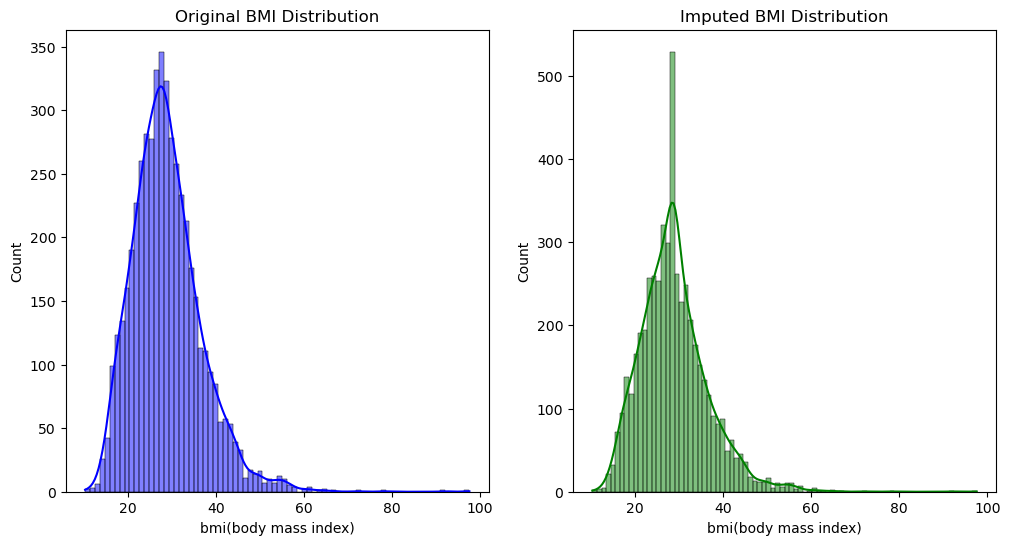

In [155]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your original DataFrame
original_bmi = df1['bmi(body mass index)']

# Impute missing values using median imputation for the entire dataset
imputer = SimpleImputer(strategy='mean')  # Use 'median' for median imputation
df['bmi(body mass index)'] = imputer.fit_transform(df1[['bmi(body mass index)']])

# Plot the distribution before and after imputation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(original_bmi, kde=True, color='blue')
plt.title('Original BMI Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['bmi(body mass index)'], kde=True, color='green')
plt.title('Imputed BMI Distribution')

plt.show()


In [158]:
print(df.columns)


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi(body mass index)', 'smoking_status', 'stroke'],
      dtype='object')


In [159]:
#result after removing null values
df.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi(body mass index)    0
smoking_status          0
stroke                  0
dtype: int64

In [160]:
#describing the health data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi(body mass index),stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.885636,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698109,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [161]:
#we are checking the duplicated values
df.duplicated().sum()

0

### EDA and Visualizations

In [162]:
#we are creating box plots to see the outliers in the dataset.

In [163]:
num_var=[]
for c in df.columns:
    if df[c].dtype == 'int64' or df[c].dtype == 'float64':
        num_var.append(c)

In [164]:
import warnings
warnings.filterwarnings('ignore')

 # ploting box plot  

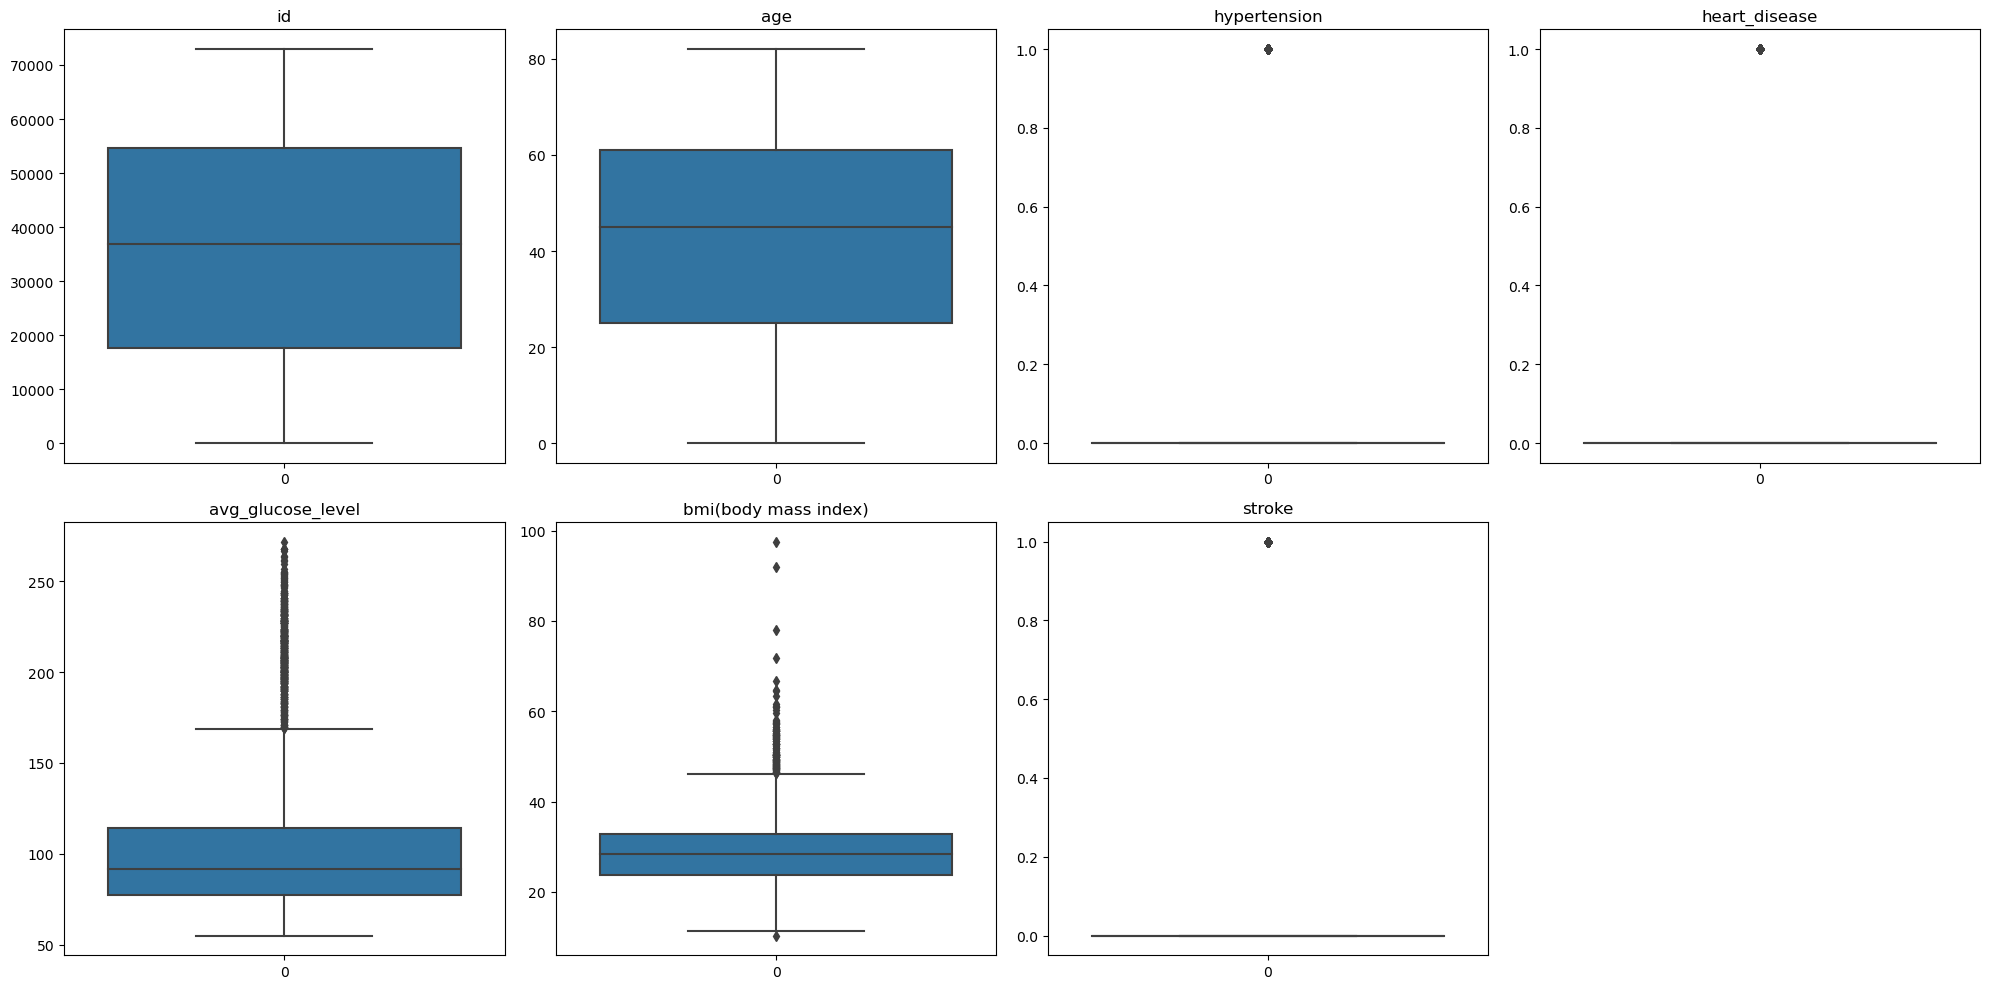

In [165]:
plt.figure(figsize=(20,10))
for i ,var in enumerate(num_var):
    plt.subplot(2,4,i+1)
    sns.boxplot(df[var])
    plt.title(var)
    
plt.tight_layout()
plt.show()


In [166]:
from scipy import stats

# Calculate Z-scores
z_scores_glucose = np.abs(stats.zscore(df['avg_glucose_level']))
z_scores_bmi = np.abs(stats.zscore(df['bmi(body mass index)']))

# Set a threshold for Z-scores (e.g., 3)
threshold = 3

# Filter out rows with high Z-scores
df = df[(z_scores_glucose < threshold) & (z_scores_bmi < threshold)]


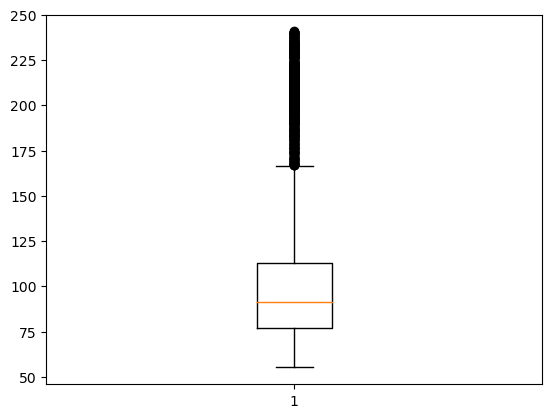

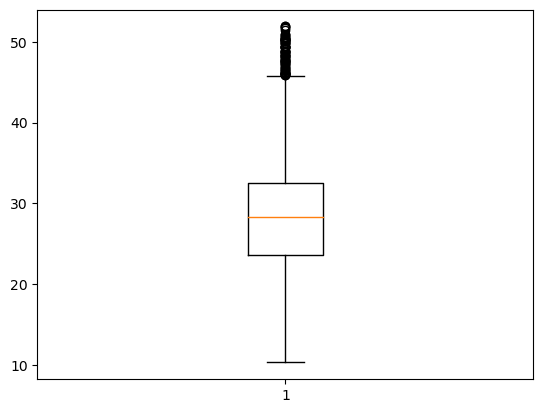

In [167]:
plt.boxplot(df['avg_glucose_level'])
plt.show()
plt.boxplot(df['bmi(body mass index)'])
plt.show()


In [168]:
# Logarithmic transformation
df['avg_glucose_level_log'] = np.log1p(df['avg_glucose_level'])
df['bmi_log'] = np.log1p(df['bmi(body mass index)'])


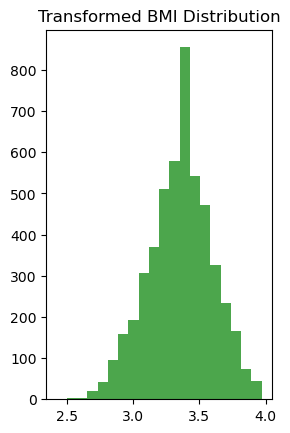

In [169]:
# Plot histograms for transformed data

plt.subplot(1, 2, 2)
plt.hist(df['bmi_log'].dropna(), bins=20, color='green', alpha=0.7)
plt.title('Transformed BMI Distribution')

plt.show()


 ### we are seeing the number of patients with stroke

In [170]:
#number of patients with str--------oke
num_stroke = df.stroke.value_counts().to_frame()
index = pd.Index(['No', 'Yes'])
num_stroke = num_stroke.set_index(index)
num_stroke

,count
No,4763
Yes,239


In [171]:
print(num_stroke.columns)

print(num_stroke.head()) 

Index(['count'], dtype='object')
     count
No    4763
Yes    239


 # Ploting a pie chart of number of patients with strok.

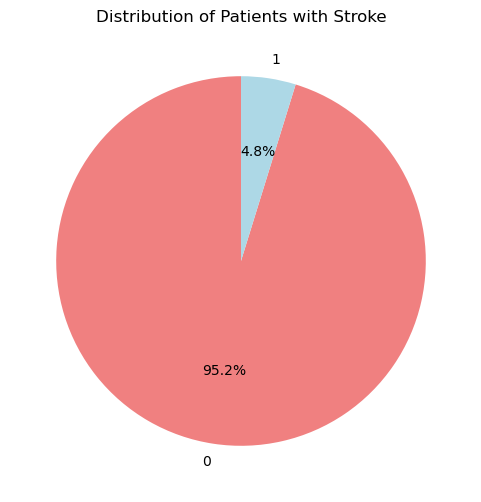

In [172]:
import matplotlib.pyplot as plt

# Count the number of patients with and without stroke
stroke_counts = df['stroke'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], startangle=90)
plt.title('Distribution of Patients with Stroke')
plt.show()


 # counts according to gender

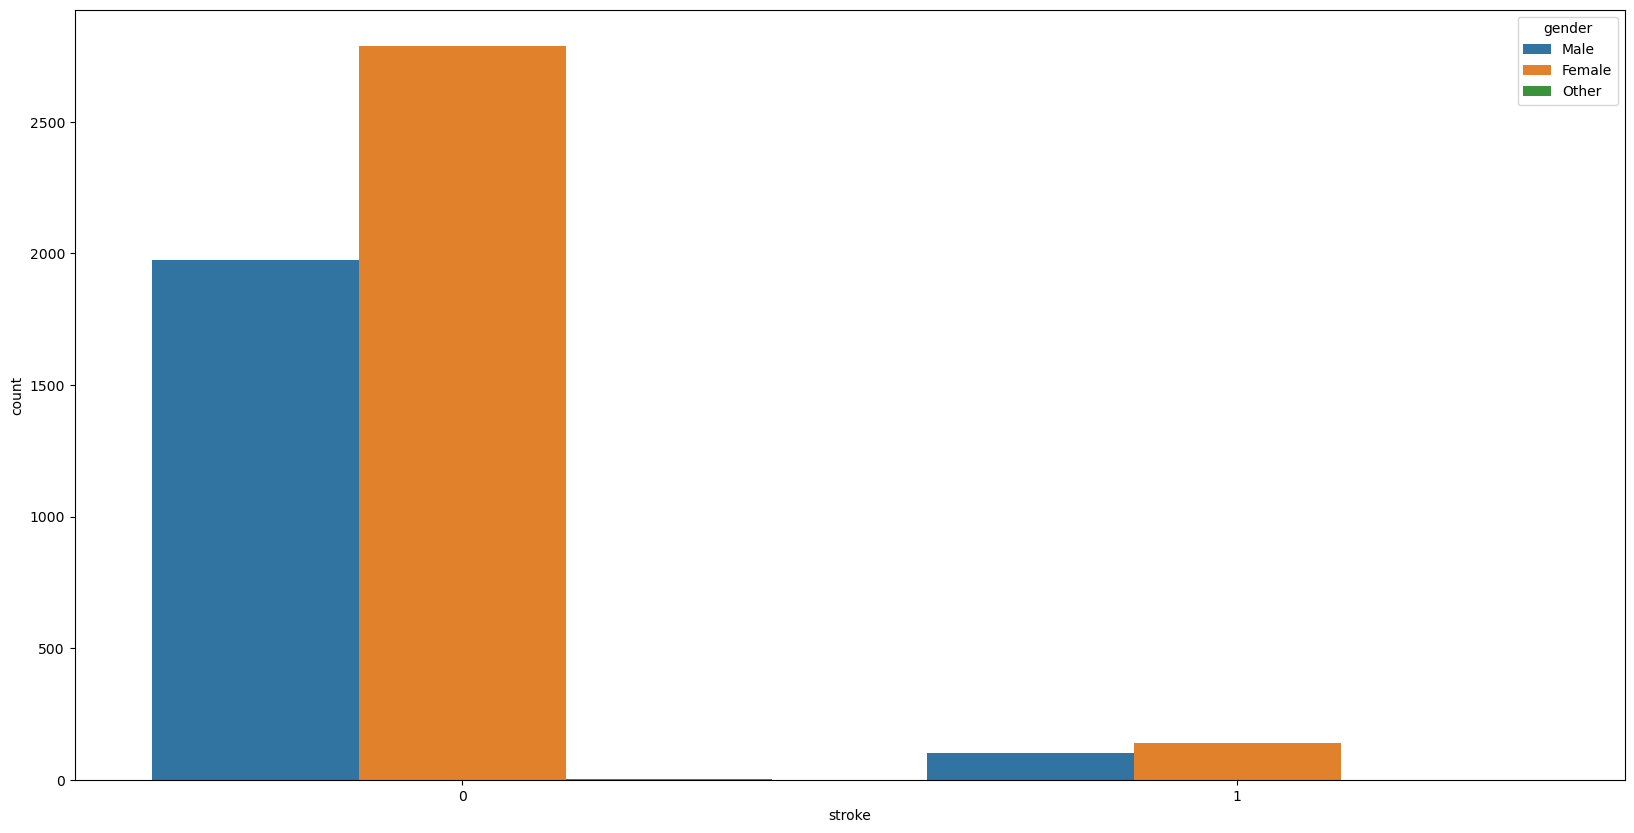

In [173]:
# plt.figure(figsize=(20,10))
# sns.countplot(healthdata)

plt.figure(figsize=(20, 10))
sns.countplot(x='stroke', hue='gender', data=df)
plt.show()

 # stroke count in both the gender

In [174]:
#we are showing the counts of both genders who has stroke
female = df[df['gender'] == 'Female']
male = df[df['gender'] == 'Male']

In [175]:
female.stroke.value_counts()

stroke
0    2787
1     138
Name: count, dtype: int64

In [176]:
male.stroke.value_counts()

stroke
0    1975
1     101
Name: count, dtype: int64

 # here we have created new datafrme to plot the pie charts for both the genders who has stroke

In [177]:
dataFrame =  pd.DataFrame({ 'stroke': ['Yes', 'No'], 'Female' : [141, 2853], 'Male': [108, 2007]})
dataFrame.index = dataFrame['stroke']
del dataFrame['stroke']
dataFrame

,Female,Male
stroke,,
Yes,141,108
No,2853,2007


 # Now we are ploting the pie charts

Text(0.5, 1.0, 'Patients with stroke')

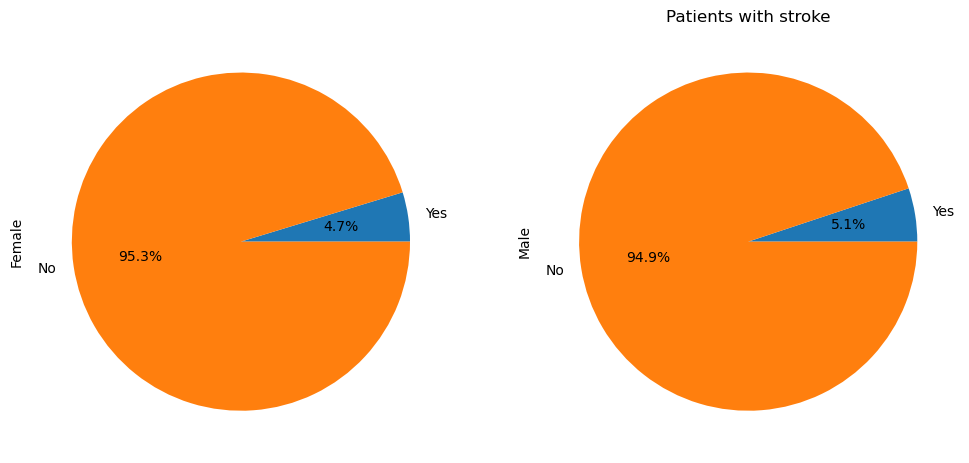

In [178]:
df1 = dataFrame[['Female', 
    'Male']].plot.pie(subplots = True, 
                             legend= False, 
                             figsize =(12,15),
                             autopct='%1.1f%%')
plt.title('Patients with stroke')

In [179]:
import sqlite3

In [180]:
conn = sqlite3.connect("D://data analytics sem 4//DAB 304 HEALTHCARE ANALYTICS//project//healthcaredb.db")
cur=conn.cursor()


In [181]:
## CREATE pizzas TABLE
df.to_sql("df",conn,if_exists="replace",index=False)

5002

## 1.Demographic Analysis:
Question: What is the distribution of stroke cases by age group and gender?


In [183]:
cur.execute(
"""SELECT gender,
       CASE
            WHEN age BETWEEN 0 AND 17 THEN '0-17'
            WHEN age BETWEEN 18 AND 35 THEN '18-35'
            WHEN age BETWEEN 36 AND 50 THEN '36-50'
            WHEN age BETWEEN 51 AND 65 THEN '51-65'
            WHEN age BETWEEN 66 AND 80 THEN '66-80'
            ELSE 'Above 80'
        END AS age_group,
        COUNT(*) as stroke_cases_count
FROM df
WHERE stroke = 1
GROUP BY gender, age_group
ORDER BY gender, age_group
""");
# Fetch the result
result = cur.fetchall()
result 



[('Female', '0-17', 2),
 ('Female', '18-35', 1),
 ('Female', '36-50', 13),
 ('Female', '51-65', 33),
 ('Female', '66-80', 77),
 ('Female', 'Above 80', 12),
 ('Male', '36-50', 6),
 ('Male', '51-65', 36),
 ('Male', '66-80', 49),
 ('Male', 'Above 80', 10)]

<Figure size 1000x600 with 0 Axes>

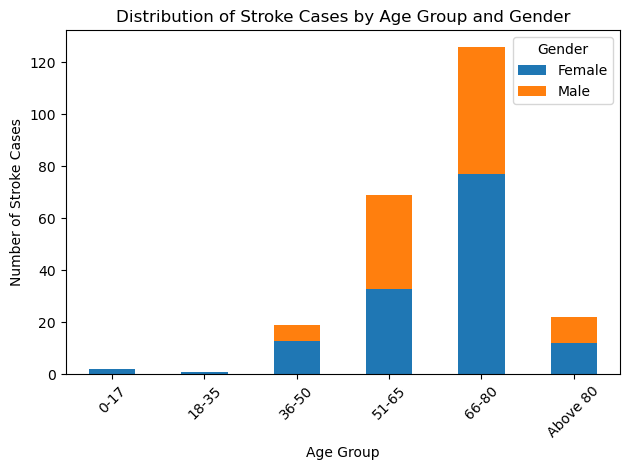

In [184]:
# Convert the SQL result to a Pandas DataFrame
columns = ['gender', 'age_group', 'stroke_cases_count']
df2 = pd.DataFrame(result, columns=columns)

# Pivot the data for plotting
pivot_data = df2.pivot_table(index='age_group', columns='gender', values='stroke_cases_count', fill_value=0)

# Plotting the graph
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True)
plt.title('Distribution of Stroke Cases by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Stroke Cases')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()




## 2.Age-Related Risk Factors:
Question: Do age-related risk factors such as hypertension or heart disease become more prevalent in older age groups?


In [185]:
cur.execute(
"""SELECT age_group,
       AVG(hypertension) AS avg_hypertension,
       AVG(heart_disease) AS avg_heart_disease
FROM (
    SELECT *,
           CASE
               WHEN age BETWEEN 0 AND 17 THEN '0-17'
               WHEN age BETWEEN 18 AND 35 THEN '18-35'
               WHEN age BETWEEN 36 AND 50 THEN '36-50'
               WHEN age BETWEEN 51 AND 65 THEN '51-65'
               WHEN age BETWEEN 66 AND 80 THEN '66-80'
               ELSE 'Above 80'
           END AS age_group
    FROM df
) AS age_grouped_data
GROUP BY age_group
ORDER BY age_group
""");
# Fetch the result
result = cur.fetchall()
result 


[('0-17', 0.0, 0.00117096018735363),
 ('18-35', 0.01652089407191448, 0.001943634596695821),
 ('36-50', 0.0671077504725898, 0.015122873345935728),
 ('51-65', 0.1495575221238938, 0.06902654867256637),
 ('66-80', 0.22466422466422467, 0.1746031746031746),
 ('Above 80', 0.25, 0.23214285714285715)]

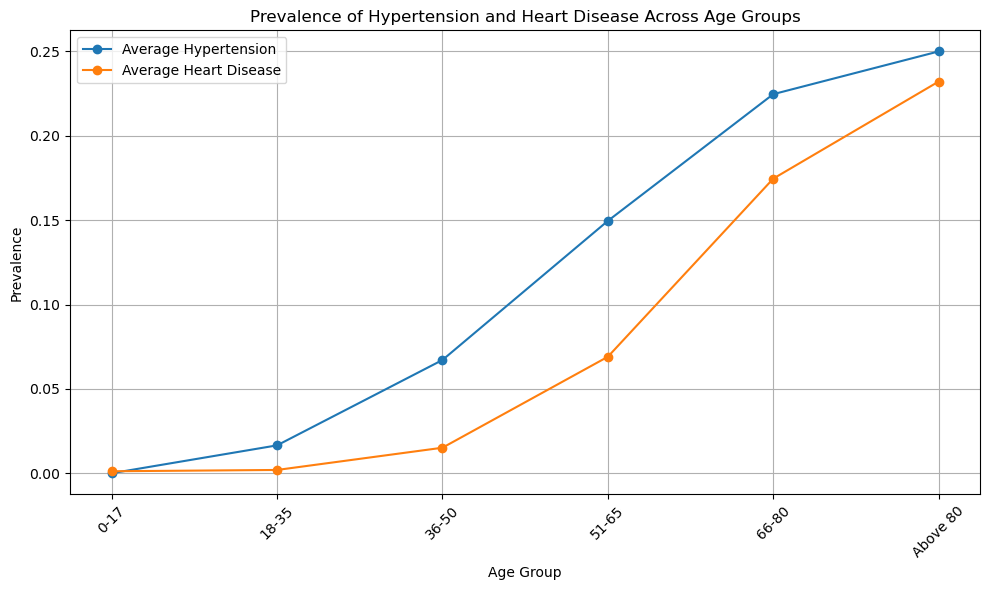

In [186]:
# Convert the fetched result to a Pandas DataFrame
columns = ['age_group', 'avg_hypertension', 'avg_heart_disease']
df3 = pd.DataFrame(result, columns=columns)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(df3['age_group'], df3['avg_hypertension'], marker='o', label='Average Hypertension')
plt.plot(df3['age_group'], df3['avg_heart_disease'], marker='o', label='Average Heart Disease')
plt.xlabel('Age Group')
plt.ylabel('Prevalence')
plt.title('Prevalence of Hypertension and Heart Disease Across Age Groups')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.Geographical Analysis:
Question: How does stroke incidence vary by residence type (urban or rural)?


In [187]:
cur.execute(
"""SELECT Residence_type, COUNT(stroke) AS stroke_cases_count
FROM df
WHERE stroke = 1
GROUP BY Residence_type
""");
# Fetch the result
result = cur.fetchall()
result

[('Rural', 108), ('Urban', 131)]

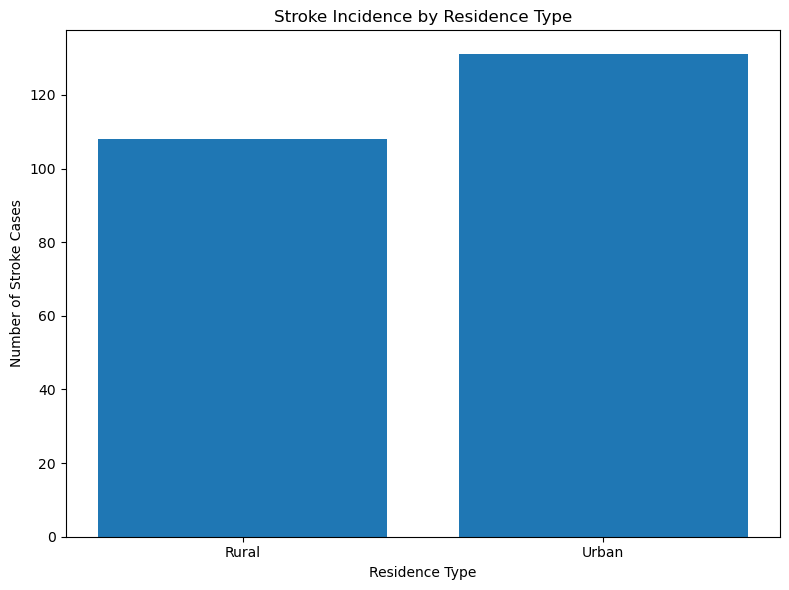

In [188]:
# Convert the fetched result to a Pandas DataFrame
columns = ['Residence_type', 'stroke_cases_count']
df4 = pd.DataFrame(result, columns=columns)

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.bar(df4['Residence_type'], df4['stroke_cases_count'])
plt.xlabel('Residence Type')
plt.ylabel('Number of Stroke Cases')
plt.title('Stroke Incidence by Residence Type')
plt.tight_layout()
plt.show()

## 4.Lifestyle Factors Analysis:
Question: Are there differences in stroke incidence among different smoking statuses?


In [189]:
cur.execute(
"""SELECT smoking_status,
       AVG(stroke) AS stroke_incidence_rate
FROM df
GROUP BY smoking_status
""");
# Fetch the result
result = cur.fetchall()
result

[('Unknown', 0.03083989501312336),
 ('formerly smoked', 0.0777262180974478),
 ('never smoked', 0.046511627906976744),
 ('smokes', 0.05084745762711865)]

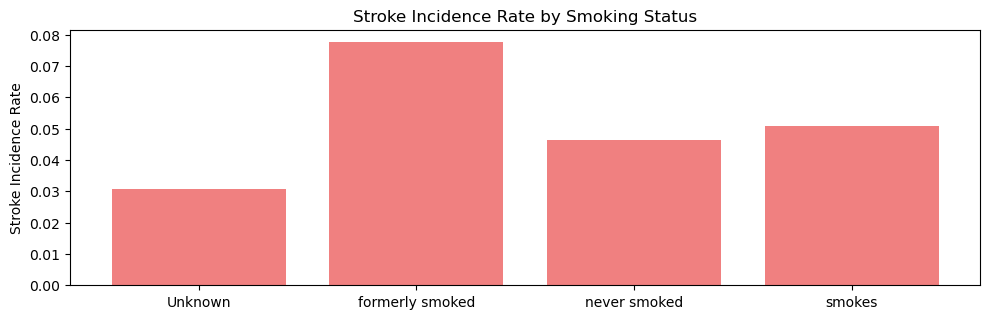

In [190]:
# Convert the fetched result to a Pandas DataFrame
columns = ['smoking_status','stroke_incidence_rate']
df5 = pd.DataFrame(result, columns=columns)



# Plotting bar chart
plt.figure(figsize=(10, 6))

# Bar chart for stroke incidence rate
plt.subplot(2, 1, 2)
plt.bar(df5['smoking_status'], df5['stroke_incidence_rate'], color='lightcoral')
plt.title('Stroke Incidence Rate by Smoking Status')
plt.ylabel('Stroke Incidence Rate')

plt.tight_layout()
plt.show()


## 5.Age-Related Lifestyle Factors:
Question: How do lifestyle factors like smoking status vary among different age groups?


In [191]:
cur.execute(
"""SELECT
    CASE
        WHEN age < 18 THEN 'Under 18'
        WHEN age BETWEEN 18 AND 24 THEN '18-24'
        WHEN age BETWEEN 25 AND 34 THEN '25-34'
        WHEN age BETWEEN 35 AND 44 THEN '35-44'
        WHEN age BETWEEN 45 AND 54 THEN '45-54'
        WHEN age BETWEEN 55 AND 64 THEN '55-64'
        WHEN age >= 65 THEN '65 and above'
        ELSE 'Unknown'
    END AS age_group,
    COUNT(*) AS total_count,
    SUM(CASE WHEN smoking_status = 'smokes' THEN 1 ELSE 0 END) AS smokes_count,
    SUM(CASE WHEN smoking_status = 'formerly smoked' THEN 1 ELSE 0 END) AS formerly_smoked_count,
    SUM(CASE WHEN smoking_status = 'never smoked' THEN 1 ELSE 0 END) AS never_smoked_count
FROM df
GROUP BY age_group
ORDER BY age_group
""");
# Fetch the result
result = cur.fetchall()
result

[('18-24', 378, 58, 31, 182),
 ('25-34', 597, 145, 80, 249),
 ('35-44', 675, 135, 103, 298),
 ('45-54', 773, 172, 154, 307),
 ('55-64', 734, 129, 177, 281),
 ('65 and above', 991, 119, 292, 393),
 ('Under 18', 854, 9, 25, 139)]

## APPLY MACHINE LEARNING

In [193]:
# # One-Hot Encoding

# Change categorical columns to numerical using dummy encoding


#Encode into numerical label

# Male=>1, Female=>0, Other=>2
df['gender'].replace(['Male', 'Female','Other'], [1, 0,2],inplace = True)

# Urban=>1, Rural=>0
df['Residence_type'].replace(['Urban', 'Rural'], [1, 0], inplace = True)

# never smoked=>0, formerly smoked=>1, Unknown=>2, smokes=>3
df['smoking_status'].replace(['never smoked', 'formerly smoked', 'Unknown', 'smokes'], [0, 1, 2, 3], inplace = True)

# Yes=>1, No=>0
df['ever_married'].replace(['Yes', 'No'], [1, 0],inplace = True)

# Never_worked=>0, Self-employed=>1, children=>2, Govt_job=>3, Private=>4
df['work_type'].replace(['Never_worked', 'Self-employed', 'children', 'Govt_job', 'Private'], [0, 1, 2, 3, 4], inplace = True)


In [194]:
# # Split Data

# In[39]:


#As our target class located at middle position, we directly state out the name of column is more easier than we index them.

x = df.drop('stroke',axis=1)
y =df['stroke']


In [195]:
# In[40]:


from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [196]:
# # DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [197]:
# Instantiate the model
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(x_train, y_train)

# Predict using the trained model
prediction_dt = dt.predict(x_test)


In [198]:
# Calculate accuracy
accuracy = accuracy_score(y_test, prediction_dt)
print('The accuracy of Decision Tree is {:.2f}%'.format(accuracy * 100))


The accuracy of Decision Tree is 89.91%


In [199]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, prediction_dt)
recall = recall_score(y_test, prediction_dt)
f1 = f1_score(y_test, prediction_dt)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.19117647058823528
Recall: 0.22033898305084745
F1-Score: 0.2047244094488189


In [200]:
pip install --upgrade scikit-learn


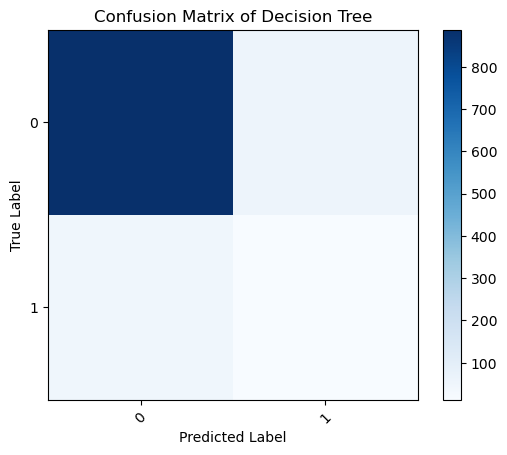

In [201]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, dt.predict(x_test))

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix of Decision Tree')
plt.colorbar()

classes = dt.classes_  # Use the classes from your model
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [202]:
# # Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Instantiate the model
rf = RandomForestClassifier()

# Fit the model to the training data
rf.fit(x_train, y_train)

# Predict using the trained model
prediction_rf = rf.predict(x_test)

In [203]:
rf_score=rf.score(x_test,y_test)
print('The accuracy of Random Forest is {:.2f}%'.format(rf_score*100))
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


The accuracy of Random Forest is 94.11%
Precision: 0.19117647058823528
Recall: 0.22033898305084745
F1-Score: 0.2047244094488189


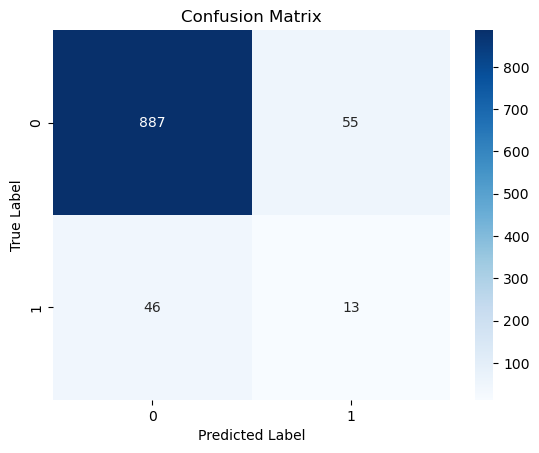

In [204]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, dt.predict(x_test))

# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
